# Linear Regression 

## 1. Linear Regression with one variable

### 1.1. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.2. Load data

In [2]:
DATA_FILE="w2/ex1data1.txt"

In [3]:
data = np.loadtxt(DATA_FILE, delimiter=",")
data[:5,:]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

### 1.3. Explorer data

In [4]:
X = data[:,0]  # population
Y = data[:,1]  # profit

In [5]:
print("number of sample = %s" % X.shape[0])

number of sample = 97


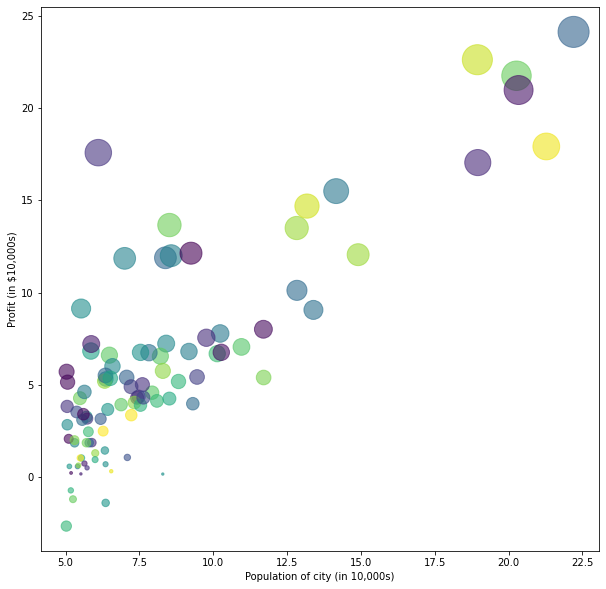

In [6]:
area = np.absolute(Y)*40
colors = np.random.rand(X.shape[0])

fig = plt.figure(figsize=(10,10))
plt.scatter(X, Y, c=colors, alpha=0.6, s=area)
plt.xlabel("Population of city (in 10,000s)")
plt.ylabel("Profit (in $10,000s)")
plt.show();
fig.savefig('images/linear_regression_restaurant.svg')

### 1.4. Define functions

In [7]:
def predict(X, w):
    Yh = np.matmul(X, w)
    return Yh

def cost_fn(X, w, Y):
    Yh = predict(X, w)
    D = Yh - Y
    cost = np.mean(D**2)
    return cost

In [9]:
def gradient_descent(X, Y, w, lr, epochs):
    logs = list()
    m = X.shape[0]
    for i in range(epochs):
        # update weights
        Yh = predict(X, w)
        w = w - (lr/m)*np.matmul(X.T,(Yh-Y))
        # compute cost
        cost = cost_fn(X, w, Y)
        logs.append(cost)
    return w, logs

### 1.5. Prepare data

In [10]:
X = np.c_[np.ones(X.shape[0]), X]  # add column of ones to X
X[:5,]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

### 1.6. Training

In [11]:
w = np.zeros(X.shape[1])  # weights initialization
lr = 1e-2  # learning rate
epochs = 1500  # number of iteration
w, logs = gradient_descent(X, Y, w, lr, epochs)
w

array([-3.63029144,  1.16636235])

### 1.7. Visualize result

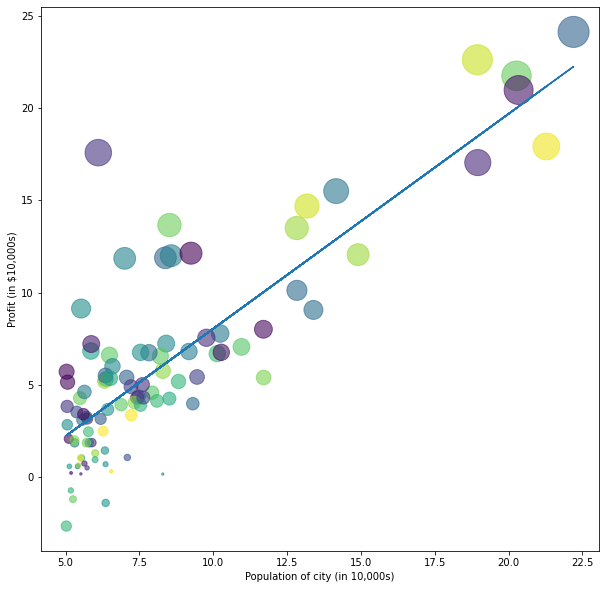

In [12]:
Yh = predict(X, w)

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,1], Y, c=colors, alpha=0.6, s=area)  # data distribution
plt.plot(X[:,1], Yh)  # prediction line

plt.xlabel("Population of city (in 10,000s)")
plt.ylabel("Profit (in $10,000s)")
plt.show();
fig.savefig('images/linear_regression_restaurant_result.svg')

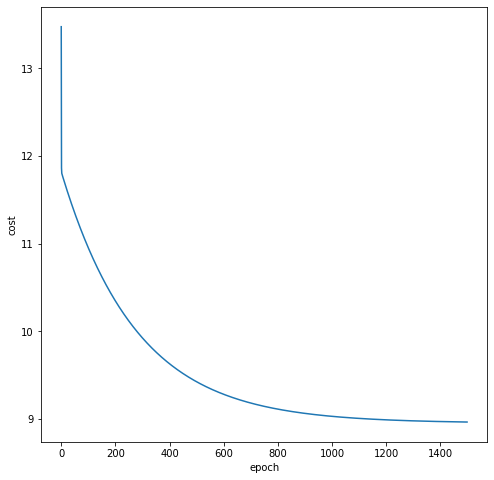

In [13]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(len(logs)), logs)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show();
fig.savefig('images/linear_regression_restaurant_cost.svg')

## 2. Linear Regression with multiple variables

### 2.1. Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 2.2. Load data

In [14]:
DATA_FILE = "w2/ex1data2.txt"

In [15]:
data = np.loadtxt(DATA_FILE, delimiter=",")
data[:5,:]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

### 2.3. Explorer data

In [16]:
X = data[:,:2]  # size & nb of bedrooms
Y = data[:,2]  # price

In [17]:
print("number of sample: %s" % X.shape[0])

number of sample: 47


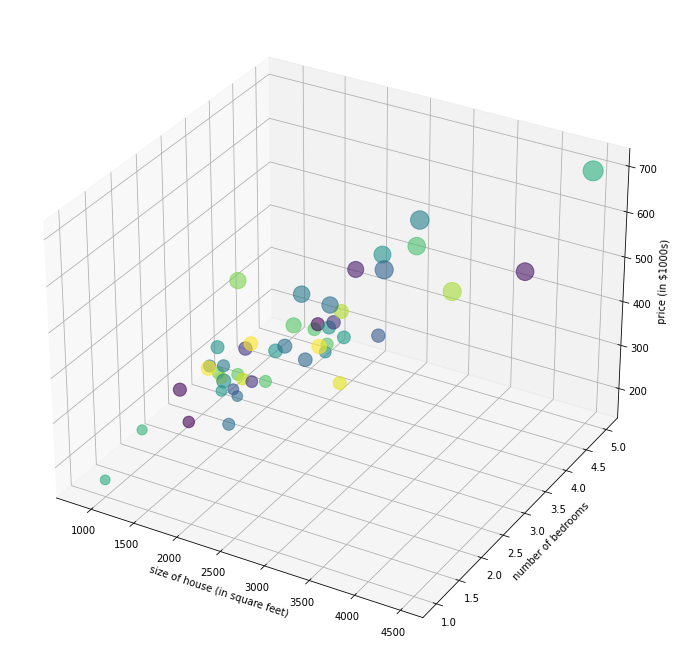

In [18]:
colors = np.random.rand(X.shape[0])
area = Y/Y.max()*400
scale = 1000
Ys = Y/scale

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], Ys, c=colors, alpha=0.6, s=area)
ax.set_xlabel("size of house (in square feet)")
ax.set_ylabel("number of bedrooms")
ax.set_zlabel("price (in $1000s)")
plt.show()
fig.savefig('images/linear_regression_house.svg')

### 2.4. Define functions

In [19]:
def normalize_features(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mu)/std
    return X_norm

### 2.5. Prepare data

In [20]:
X_norm = normalize_features(X)
X_norm = np.c_[np.ones(len(Y)), X_norm]
X_norm[:5,:]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

### 2.6. Training

In [21]:
w = np.zeros(X_norm.shape[1])  # weights initialization
lr = 1e-2  # learning rate
epochs = 400  # number of iterations
w, logs = gradient_descent(X_norm, Y, w, lr, epochs)
w

array([334302.06399328,  99411.44947359,   3267.01285407])

### 2.7. Visualize result

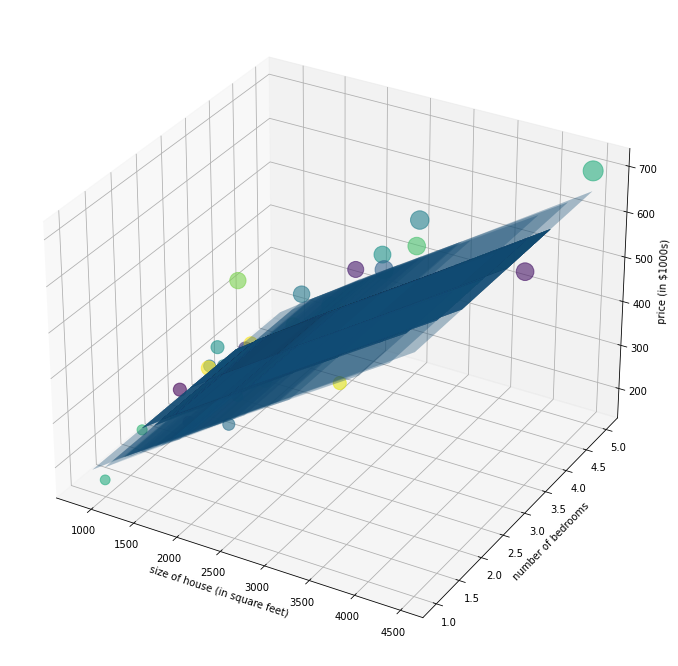

In [22]:
scale = 1000
Ys = Y/scale
Yh = predict(X_norm, w)
Zm,_ = np.meshgrid(Yh, Yh)
Xm, Ym = np.meshgrid(X[:,0], X[:,1])
Zm = Zm/scale

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], Ys, c=colors, alpha=0.6, s=area)  # data distribution
ax.plot_surface(Xm, Ym, Zm, alpha=0.1)  # surface prediction
ax.set_xlabel("size of house (in square feet)")
ax.set_ylabel("number of bedrooms")
ax.set_zlabel("price (in $1000s)")
plt.show()
fig.savefig('images/linear_regression_house_result.svg')

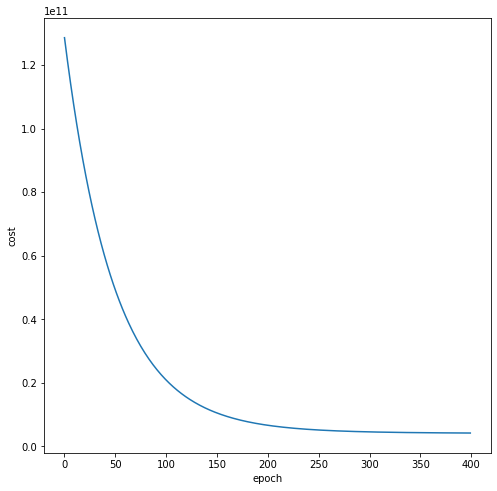

In [23]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(len(logs)), logs)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show();
fig.savefig('images/linear_regression_house_cost.svg')